<a href="https://colab.research.google.com/github/Digvijayapatro/unsupervised_learning/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Kmeans algorithm implementation
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def assign_clusters(self, X, centroids):
        clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=-1)
        return clusters

    def update_centroids(self, X, clusters):
        centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.n_clusters)])
        return centroids

    def fit(self, X):
        centroids = self.initialize_centroids(X)

        for _ in range(self.max_iters):
            prev_centroids = centroids
            clusters = self.assign_clusters(X, centroids)
            centroids = self.update_centroids(X, clusters)

            if np.all(prev_centroids == centroids):
                break

        self.centroids = centroids
        self.clusters = clusters

    def predict(self, X):
        clusters = self.assign_clusters(X, self.centroids)
        return clusters

In [ ]:
# Load the Iris dataset
iris_df = pd.read_csv('/content/Iris Dataset.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# find the no of rows and columns 
iris_df.shape

(150, 6)

In [ ]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Extract the features and convert them into a NumPy array
X = iris_df.iloc[:, :-1].values

In [ ]:
# Extract the class labels for future comparison
y_true = iris_df.iloc[:, -1].values

In [ ]:
# Remove the "Species" column from the dataset
X_without_species = X[:, :-1]

In [ ]:
# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3, max_iters=100)

In [ ]:
# Fit the model to the Iris dataset
kmeans.fit(X_without_species)

In [ ]:

# Get the predicted clusters
y_pred = kmeans.predict(X_without_species)

In [ ]:
# Calculate the accuracy
def calculate_accuracy(y_true, y_pred):
    label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    y_true_numeric = np.array([label_mapping[label] for label in y_true])
    
    # Calculate the accuracy based on the majority vote
    accuracy = 0.0
    for cluster in np.unique(y_pred):
        cluster_labels = y_true_numeric[y_pred == cluster]
        majority_label = np.bincount(cluster_labels).argmax()
        cluster_accuracy = np.mean(cluster_labels == majority_label)
        accuracy += cluster_accuracy * len(cluster_labels)
    
    accuracy /= len(y_true)
    return accuracy

accuracy = calculate_accuracy(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9866666666666667


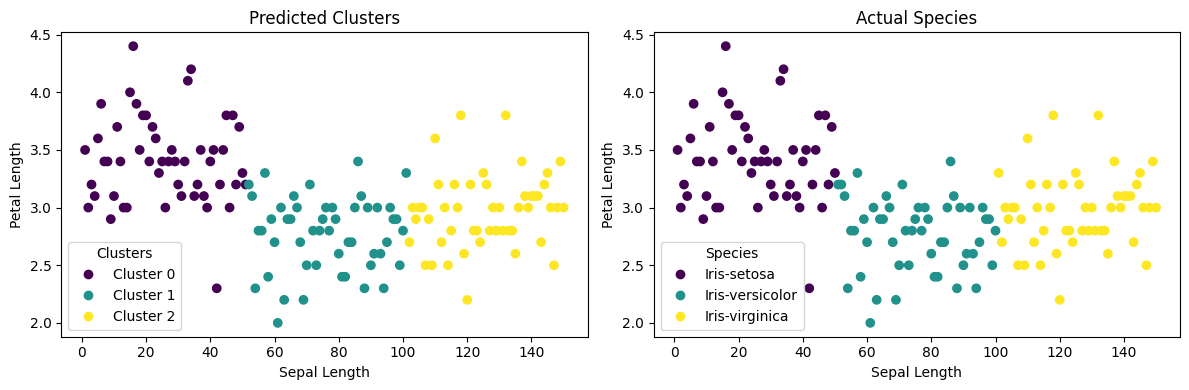

In [ ]:
# Plot the clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the predicted clusters
scatter1 = ax1.scatter(X[:, 0], X[:, 2], c=y_pred)
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Petal Length')
ax1.set_title('Predicted Clusters')

# Plotting the actual species
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_true_numeric = np.array([label_mapping[label] for label in y_true])
scatter2 = ax2.scatter(X[:, 0], X[:, 2], c=y_true_numeric)
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Petal Length')
ax2.set_title('Actual Species')

# Add legend
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
ax1.legend(handles=scatter1.legend_elements()[0], labels=legend_labels, title='Clusters')
ax2.legend(handles=scatter2.legend_elements()[0], labels=label_mapping.keys(), title='Species')

plt.tight_layout()
plt.show()


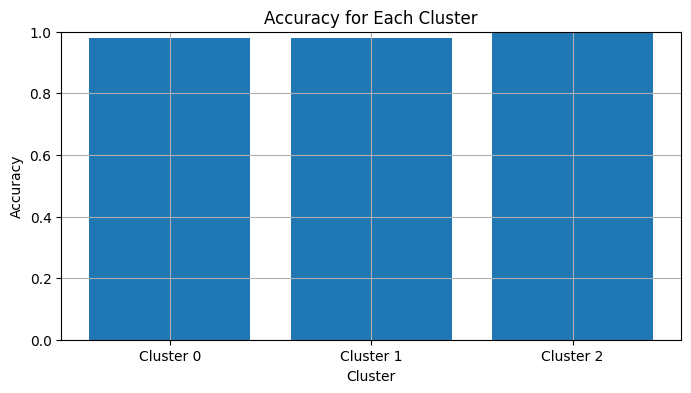

In [ ]:
# Calculate accuracy for each cluster separately
cluster_accuracies = []
for cluster in range(kmeans.n_clusters):
    cluster_indices = np.where(y_pred == cluster)[0]
    cluster_accuracy = calculate_accuracy(y_true[cluster_indices], y_pred[cluster_indices])
    cluster_accuracies.append(cluster_accuracy)

# Plot the accuracy for each cluster
plt.figure(figsize=(8, 4))
plt.bar(range(kmeans.n_clusters), cluster_accuracies)
plt.xlabel('Cluster')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Cluster')
plt.xticks(range(kmeans.n_clusters), legend_labels)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

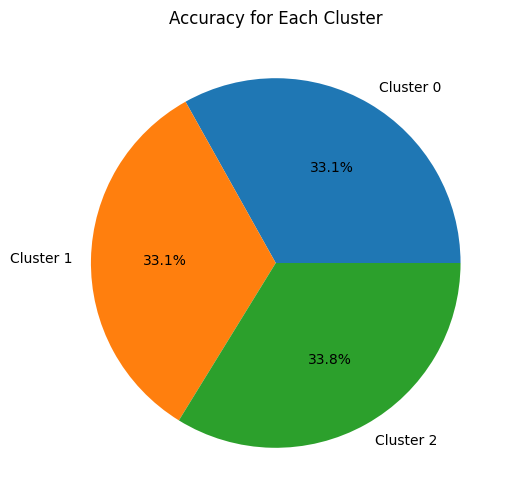

In [ ]:
# Plot the accuracy using a pie chart
plt.figure(figsize=(6, 6))
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
plt.pie(cluster_accuracies, labels=labels, autopct='%1.1f%%')
plt.title('Accuracy for Each Cluster')
plt.show()